In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('/home/saf/Desktop/TCS Internship/drug dataset/drug.csv')
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [3]:
df.shape

(362806, 12)

In [4]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [5]:
df.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [6]:
df['Condition'].value_counts()

Condition
Other                                                  49765
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect of Benzodiazepine-Based Tranquilizer        1
Name: count, Length: 1806, dtype: int64

In [7]:
df = df.drop(labels=df[df.Condition == 'Other'].index,axis=0)
df['Condition'].value_counts()

Condition
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
Neuropathic Pain                                        8988
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect of Benzodiazepine-Based Tranquilizer        1
Name: count, Length: 1805, dtype: int64

In [8]:
df.isnull().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          34
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [15]:
#dropdf = df.dropna()
df["Reviews"].fillna("",inplace=True)

In [16]:
df.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [ ]:
# from sklearn.impute import SimpleImputer

# impt = SimpleImputer(fill_value=np.nan,strategy='mean')
# a = impt.fit_transform(df)

In [17]:
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,313041.000000,313041.000000,313041.000000,313041.000000,313041.000000
mean,36199.384934,4.038062,3.556033,3.148850,6.879463
std,52305.060347,1.302102,1.440720,1.604141,9.390988
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4822.000000,3.000000,3.000000,1.000000,1.000000
50%,8880.000000,5.000000,4.000000,3.000000,4.000000
75%,63164.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,6.000000,6.000000,6.000000,222.000000


In [18]:
df['Sex'].unique()

array(['Male', 'Female', ' '], dtype=object)

In [20]:
df['Sex'].unique()

array([0, 1, 2])

In [12]:
df['Age'].unique()

array(['75 or over', '25-34', '45-54', '55-64', '19-24', ' ', '35-44',
       '13-18', '65-74', '7-12', '0-2', '3-6'], dtype=object)

In [13]:
df['Effectiveness'].value_counts()

Effectiveness
5    113229
4     71814
3     52573
1     48794
2     26629
6         2
Name: count, dtype: int64

In [14]:
df['Satisfaction'].value_counts()

Satisfaction
5    96280
1    85269
4    55413
3    45232
2    30845
6        2
Name: count, dtype: int64

In [15]:
df[['Drug','Condition']].head(15)

,Drug,Condition
0,25dph-7.5peh,Stuffy Nose
1,25dph-7.5peh,Cold Symptoms
6,wymzya fe,Birth Control
7,wymzya fe,Disease of Ovaries with Cysts
8,wymzya fe,Acne
9,"12 hour nasal relief spray, non-aerosol",Stuffy Nose
11,lyza,Birth Control
12,lyza,Birth Control
13,lyza,Birth Control
14,lyza,Birth Control


In [16]:
df[['Drug','Sides']].head(15)

,Drug,Sides
0,25dph-7.5peh,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,25dph-7.5peh,"Drowsiness, dizziness , dry mouth /nose/thro..."
6,wymzya fe,"Nausea , vomiting , headache , bloating , ..."
7,wymzya fe,"Nausea , vomiting , headache , bloating , ..."
8,wymzya fe,"Nausea , vomiting , headache , bloating , ..."
9,"12 hour nasal relief spray, non-aerosol","Temporary burning, stinging, dryness in the no..."
11,lyza,"Nausea , vomiting , headache , bloating , ..."
12,lyza,"Nausea , vomiting , headache , bloating , ..."
13,lyza,"Nausea , vomiting , headache , bloating , ..."
14,lyza,"Nausea , vomiting , headache , bloating , ..."


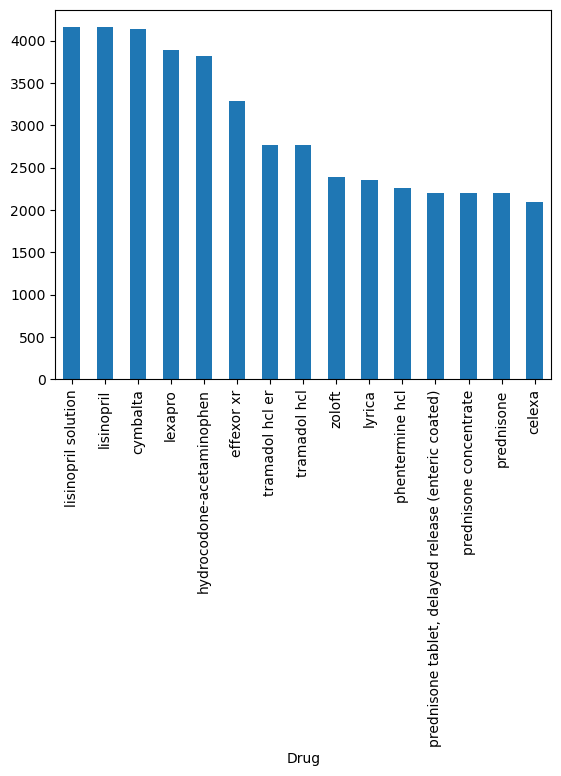

In [17]:
df['Drug'].value_counts().head(15).plot(kind='bar')
plt.rcParams['figure.figsize'] = (12,8)
plt.show()

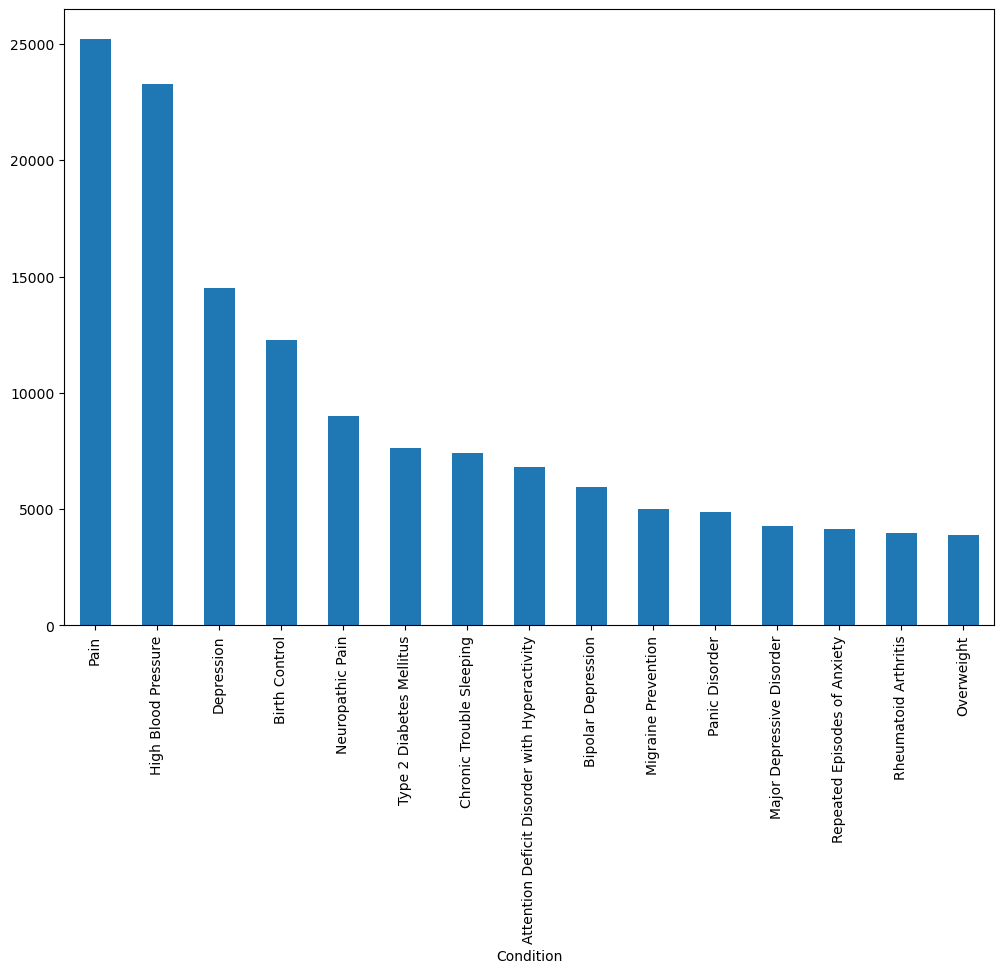

In [18]:
df['Condition'].value_counts().head(15).plot(kind='bar')
plt.rcParams['figure.figsize'] = (12,8)
plt.show()

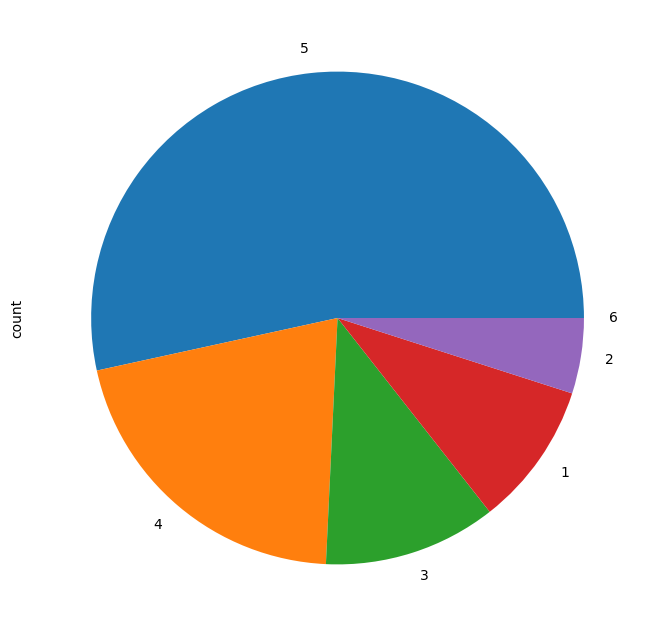

In [19]:
df['EaseofUse'].value_counts().plot(kind='pie')
plt.show()

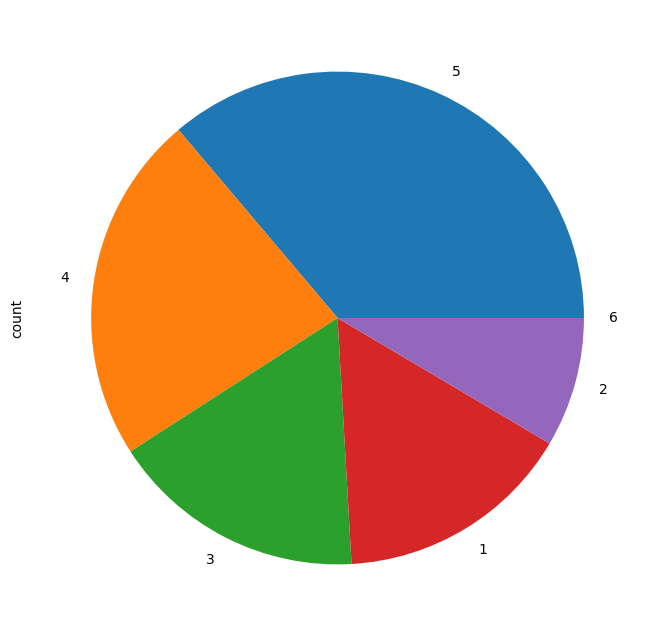

In [20]:
df['Effectiveness'].value_counts().plot(kind='pie')
plt.show()

<AxesSubplot:ylabel='count'>

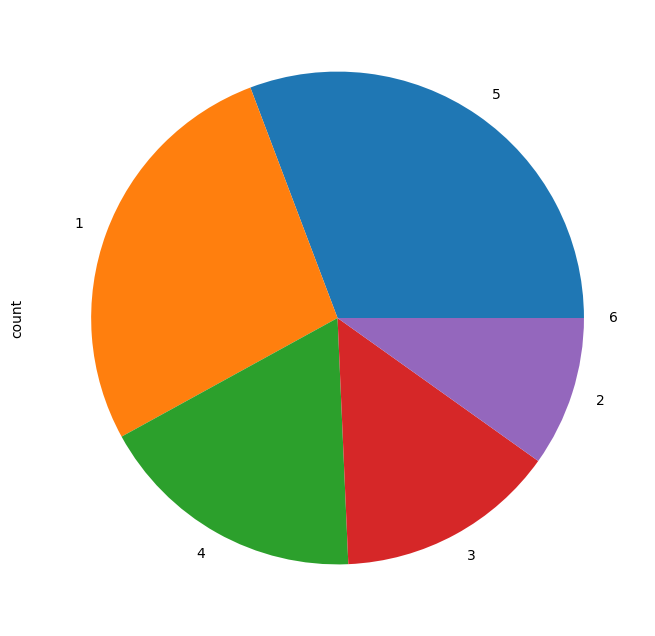

In [21]:
df['Satisfaction'].value_counts().plot(kind='pie')

In [22]:
df['Sex'].value_counts()

Sex
Female    203257
Male       85350
           24434
Name: count, dtype: int64

<AxesSubplot:title={'center':'Gender'}, xlabel='Sex'>

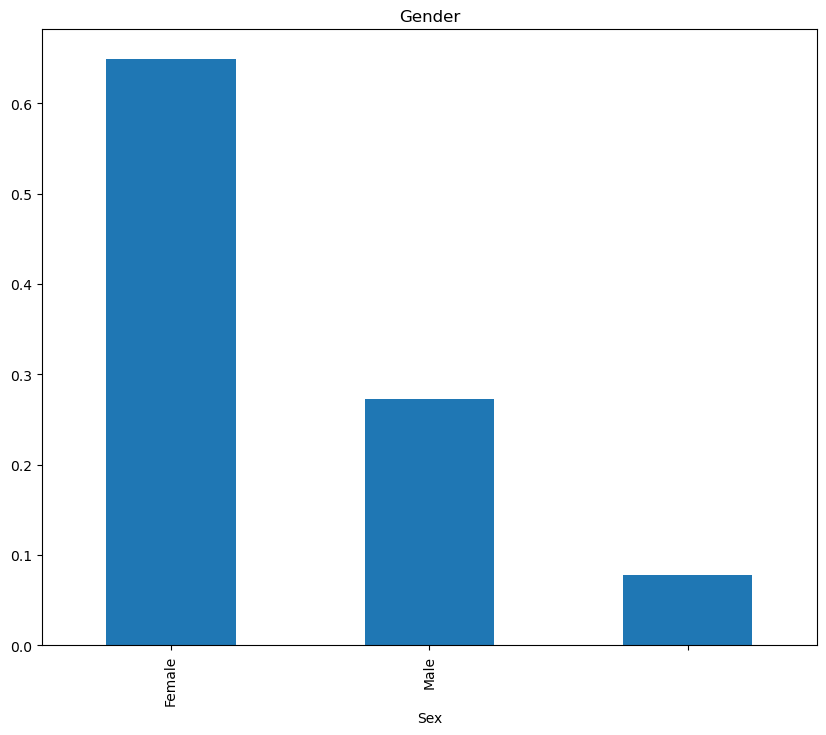

In [23]:
df['Sex'].value_counts(normalize=True).plot.bar(figsize=(10,8),
                                                title='Gender')

In [24]:
def count_values_in_column(data,feature):
    plus    = data.loc[:,feature].value_counts(dropna = False)
    percent = round(data.loc[:,feature].value_counts(dropna = False,normalize=True)*100,2)
    return pd.concat([plus,percent],axis=1,keys=['Total','Percentage'])
count_values_in_column(df,'Sex')

,Total,Percentage
Sex,,
Female,203257,64.93
Male,85350,27.26
,24434,7.81


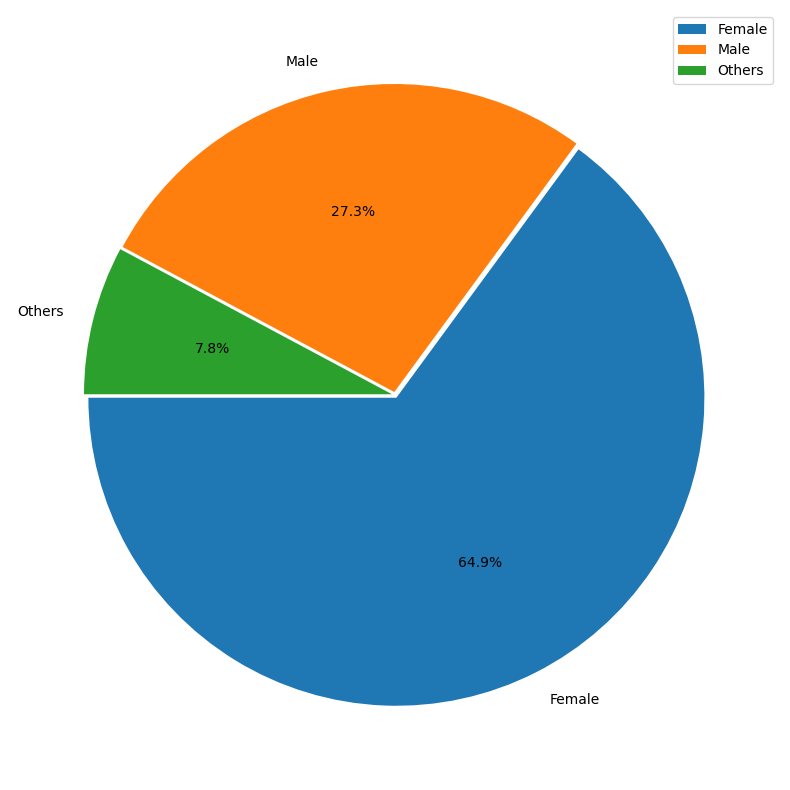

In [25]:

a = count_values_in_column(df,'Sex')
a = a['Total']
plt.figure(figsize=(10,10))
labels = ['Female','Male','Others']

plt.pie(a, labels=labels, startangle=180,autopct='%1.1f%%',explode=[0.01,0.01,0.01])
plt.legend()
plt.show()


In [ ]:
df['Sex'].replace(['Male', 'Female', ' '],[0,1,2],inplace = True)

In [26]:
df.Age.mode()

0    45-54
Name: Age, dtype: object

In [27]:
obj1 = df[['Age']]
obj1 = obj1.fillna(obj1.mode().iloc[0])
obj1

,Age
0,75 or over
1,25-34
6,25-34
7,45-54
8,25-34
...,...
362800,55-64
362801,55-64
362803,25-34
362804,55-64


In [28]:
df.Reviews.mode()

0     
Name: Reviews, dtype: object

In [29]:
obj2 = df[['Reviews']]
obj2 = obj2.fillna(obj2.mode().iloc[0])
obj2

,Reviews
0,I'm a retired physician and of all the meds I ...
1,cleared me right up even with my throat hurtin...
6,Haven't gotten pregnant so it does it's job. I...
7,I have take this for 5 years age 45-50 to prev...
8,
...,...
362800,"I goofed,it was june 16th of 2007 that I had m..."
362801,I took the whole 12 weeks.I could have stopped...
362803,"As long as I was on chantix, I didn't smoke. ..."
362804,Started this medication Oct 5th 2008. Haven't ...


In [30]:
obj3 = df[['Sex']]
obj3

,Sex
0,Male
1,Female
6,Female
7,Female
8,Female
...,...
362800,
362801,Female
362803,Female
362804,Male


In [31]:
obj3.Sex.mode()

0    Female
Name: Sex, dtype: object

In [32]:
obj3 = obj3.fillna(obj3.mode().iloc[0])
obj3

,Sex
0,Male
1,Female
6,Female
7,Female
8,Female
...,...
362800,
362801,Female
362803,Female
362804,Male


In [33]:
obj4 = df[['Sides']]
df.Sides.mode()

0    Nausea ,  vomiting ,  constipation ,  lighthea...
Name: Sides, dtype: object

In [34]:
obj4 = obj4.fillna(obj4.mode().iloc[0])
obj4

,Sides
0,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,"Drowsiness, dizziness , dry mouth /nose/thro..."
6,"Nausea , vomiting , headache , bloating , ..."
7,"Nausea , vomiting , headache , bloating , ..."
8,"Nausea , vomiting , headache , bloating , ..."
...,...
362800,"Nausea , headache , vomiting , drowsiness, g..."
362801,"Nausea , headache , vomiting , drowsiness, g..."
362803,"Nausea , headache , vomiting , drowsiness, g..."
362804,"Nausea , headache , vomiting , drowsiness, g..."


In [35]:
obj5 = df[['Condition']]
df.Condition.mode()

0    Pain
Name: Condition, dtype: object

In [36]:
obj5 = obj5.fillna(obj5.mode().iloc[0])
obj5

,Condition
0,Stuffy Nose
1,Cold Symptoms
6,Birth Control
7,Disease of Ovaries with Cysts
8,Acne
...,...
362800,Stop Smoking
362801,Stop Smoking
362803,Stop Smoking
362804,Stop Smoking


In [37]:
data=pd.concat([df,obj1,obj2,obj3,obj4,obj5],axis=1)
data

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Age,Reviews,Sex,Sides,Condition
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,75 or over,I'm a retired physician and of all the meds I ...,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",Stuffy Nose
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,25-34,cleared me right up even with my throat hurtin...,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",Cold Symptoms
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0,25-34,Haven't gotten pregnant so it does it's job. I...,Female,"Nausea , vomiting , headache , bloating , ...",Birth Control
7,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0,45-54,I have take this for 5 years age 45-50 to prev...,Female,"Nausea , vomiting , headache , bloating , ...",Disease of Ovaries with Cysts
8,25-34,Acne,4/27/2016,wymzya fe,163180,4,2,,2,Female,"Nausea , vomiting , headache , bloating , ...",1,25-34,,Female,"Nausea , vomiting , headache , bloating , ...",Acne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362800,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,"I goofed,it was june 16th of 2007 that I had m...",5,,"Nausea , headache , vomiting , drowsiness, g...",0,55-64,"I goofed,it was june 16th of 2007 that I had m...",,"Nausea , headache , vomiting , drowsiness, g...",Stop Smoking
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2,55-64,I took the whole 12 weeks.I could have stopped...,Female,"Nausea , headache , vomiting , drowsiness, g...",Stop Smoking
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3,25-34,"As long as I was on chantix, I didn't smoke. ...",Female,"Nausea , headache , vomiting , drowsiness, g...",Stop Smoking
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1,55-64,Started this medication Oct 5th 2008. Haven't ...,Male,"Nausea , headache , vomiting , drowsiness, g...",Stop Smoking


In [38]:
print("Original Data Set Shape :", df.shape)
print("Cleaned  Data Set Shape :", data.shape)

Original Data Set Shape : (313041, 12)
Cleaned  Data Set Shape : (313041, 17)


In [39]:
data.isnull().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          34
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
Age               0
Reviews           0
Sex               0
Sides             0
Condition         0
dtype: int64

In [40]:
data = data.dropna(how = 'any', axis = 1)

In [41]:
print("Original Data Set Shape :", df.shape)
print("Cleaned  Data Set Shape :", data.shape)

Original Data Set Shape : (313041, 12)
Cleaned  Data Set Shape : (313041, 16)


In [42]:
data.isnull().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
Age              0
Reviews          0
Sex              0
Sides            0
Condition        0
dtype: int64

In [43]:
data.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
Age              object
Reviews          object
Sex              object
Sides            object
Condition        object
dtype: object

In [44]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,313041.000000,313041.000000,313041.000000,313041.000000,313041.000000
mean,36199.384934,4.038062,3.556033,3.148850,6.879463
std,52305.060347,1.302102,1.440720,1.604141,9.390988
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4822.000000,3.000000,3.000000,1.000000,1.000000
50%,8880.000000,5.000000,4.000000,3.000000,4.000000
75%,63164.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,6.000000,6.000000,6.000000,222.000000


In [45]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Satisfaction', 'Sex', 'Sides', 'UsefulCount', 'Age',
       'Reviews', 'Sex', 'Sides', 'Condition'],
      dtype='object')

In [46]:
# data['Age'] = data['Age'].map({'0-2' : 1,
#                                '03-Jun' :2,
#                                '07-Dec' :3,
#                                '13-18' :4,
#                                '19-24': 5,
#                                '25-34': 6,
#                                '35-44': 7,
#                                '45-54': 8,
#                                '55-64': 9,
#                                '65-74': 10,
#                                '75 or over':11}).astype(int)
# data ['Sex'] = data['Sex'].map({'Male' : 0, 'Female': 1}).astype(int)                        

In [ ]:
data ['Sex'] = data['Sex'].rdd.map({'Male' : 0, 'Female': 1,'':2}).astype(int)  

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

/tmp/ipykernel_6332/469103719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


0        2014-09-21
1        2011-01-13
6        2017-06-15
7        2017-01-30
8        2016-04-27
            ...    
362800   2008-11-14
362801   2008-11-14
362803   2008-11-13
362804   2008-11-13
362805   2008-11-12
Name: Date, Length: 313041, dtype: datetime64[ns]

In [ ]:
target = data.pop('Sides')
data.head(10)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,Age,Reviews,Sex,Condition
0,75 or over,Stuffy Nose,2014-09-21,25dph-7.5peh,146724,5,5,5,Male,0,75 or over,I'm a retired physician and of all the meds I ...,Male,Stuffy Nose
1,25-34,Cold Symptoms,2011-01-13,25dph-7.5peh,146724,5,5,5,Female,1,25-34,cleared me right up even with my throat hurtin...,Female,Cold Symptoms
6,25-34,Birth Control,2017-06-15,wymzya fe,163180,5,5,2,Female,0,25-34,Haven't gotten pregnant so it does it's job. I...,Female,Birth Control
7,45-54,Disease of Ovaries with Cysts,2017-01-30,wymzya fe,163180,5,5,5,Female,0,45-54,I have take this for 5 years age 45-50 to prev...,Female,Disease of Ovaries with Cysts
8,25-34,Acne,2016-04-27,wymzya fe,163180,4,2,2,Female,1,25-34,,Female,Acne
9,55-64,Stuffy Nose,2012-10-29,"12 hour nasal relief spray, non-aerosol",9800,4,2,2,Male,0,55-64,The 12 hour spray only works for me for 6 hours.,Male,Stuffy Nose
11,19-24,Birth Control,2018-11-17,lyza,164750,5,5,2,,0,19-24,Taking Lyza made me break out HORRIBLY. I trie...,,Birth Control
12,,Birth Control,2018-07-03,lyza,164750,2,1,1,Female,0,,This stuff needs to be removed from the market...,Female,Birth Control
13,19-24,Birth Control,2018-03-06,lyza,164750,2,3,1,Female,0,19-24,"I usually have zero to little acne, a few mont...",Female,Birth Control
14,35-44,Birth Control,2018-02-13,lyza,164750,5,5,5,,0,35-44,I was concerned about starting a bc pill due t...,,Birth Control


In [ ]:
data.dtypes

Age                      object
Condition                object
Date             datetime64[ns]
Drug                     object
DrugId                    int64
EaseofUse                 int64
Effectiveness             int64
Satisfaction              int64
Sex                      object
UsefulCount               int64
Age                      object
Reviews                  object
Sex                      object
Condition                object
dtype: object

In [ ]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Satisfaction', 'Sex', 'UsefulCount', 'Age', 'Reviews',
       'Sex', 'Condition'],
      dtype='object')

In [ ]:
col = ['Age', 'Condition','Drug','Sex','Reviews']
for x in col :
    data[x] = pd.factorize(data[x])[0]
target = pd.factorize(target)[0]
data.head()

ValueError: could not broadcast input array from shape (313041,2) into shape (313041,)